<a href="https://colab.research.google.com/github/RafaelSigmoidal/Data-Science/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/visualisations/listings.csv")

## Análise dos Dados


# **Dicionário das variáveis**

* **id** - Codigo de indentificação do imovel
* **name** - Nome da Propriedade 
* **host_id** - Codigo de indentificação do proprietario
* **host_name** - Nome do Proprietario 
* **neighbourdhood_group** - Dados invalidos
* **neighbourhood** - Bairro do imóvel
* **latitude** - Cordenada de latitude da propriedade
* **Longitude** - Cordenada da longitude da propriedade 
* **room_type** - Tipo de quarto oferecido
* **price** - preço do aluguel do imovel 
* **minimum_ nights** - Quantidade minima de noites para Reservar 
* **number_of_reviews** - Numero de Reviews que propriedade possui
* **last_review** -  Data do ultimo review 
* **reviews_per_month** - Quantidade de Reviews por mês
* **calculates_host_listing_count** - Quantidade de imoveis do mesmo proprietario
* **availability_365** - Numero de dias de disponibilidade no ano
* **license** - lincença do imovel 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,81,3,190,2021-09-24,2.41,1,329,10,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,414,2021-10-06,3.34,1,230,29,R18000034991
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,125,4,36,2021-10-04,0.40,7,144,16,2120297
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,13,2021-10-16,0.16,1,0,4,City registration pending
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.09,1,167,3,R20000055258


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print ("Entradas: {}".format(df.shape[0]))
print ("Variaveis: {}".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 6528
Variaveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Nosso Conjunto de Dados possui 6528 entradas e 18 variáveis com diversos types:

 Exemplos (int64, object, float64).

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum () / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.155944
last_review                       0.155944
license                           0.067708
host_name                         0.000460
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

A coluna de neighbourd_group apresenta de cerca 100% dos seus dados ausentes,e logo em seguida as colunas de reviews_per_month, last_review e License com pequenas porcetagens de valores ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

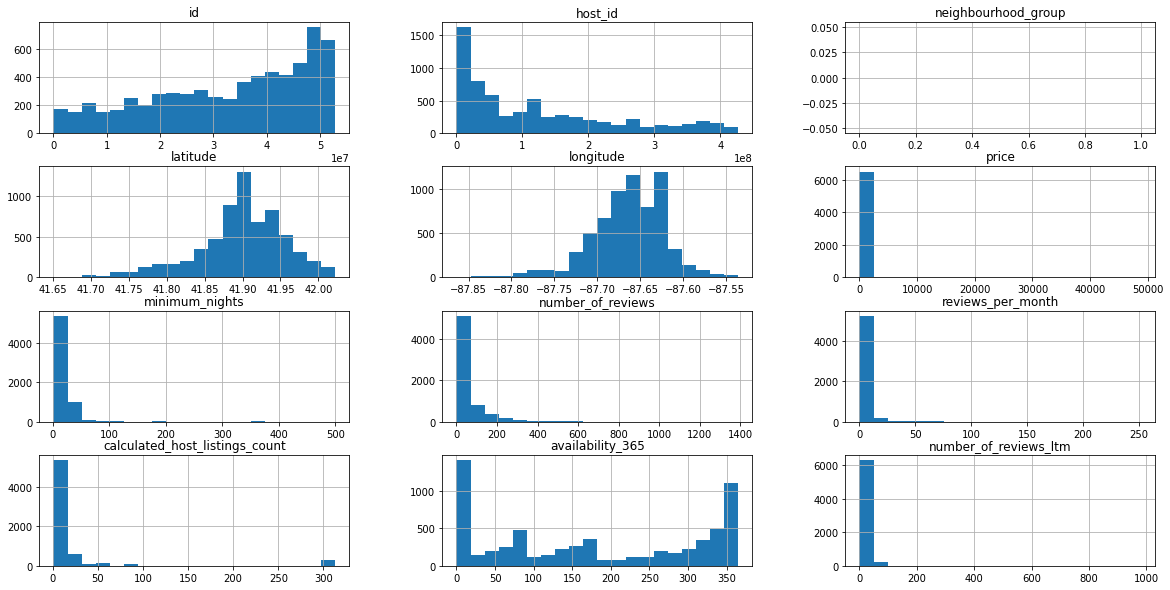

In [13]:
# plotar o histograma das variáveis numérico
df.hist(bins=20, figsize=(20,10));


# **Outliers?**

In [14]:
df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6528.000000,6528.000000,6528.000000,5510.000000,6528.000000,6528.000000
mean,299.258425,9.211397,46.377145,3.521632,22.345895,178.385110
std,2319.930240,22.728897,75.133071,7.855918,66.699864,137.490354
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,2.000000,0.530000,1.000000,44.000000
50%,119.000000,2.000000,16.000000,1.720000,2.000000,166.000000
75%,190.000000,4.000000,57.000000,3.760000,9.000000,327.000000
max,48864.000000,500.000000,1390.000000,252.000000,313.000000,365.000000


minumum_nights: valores acima de 150:
73 entradas
1.118260%


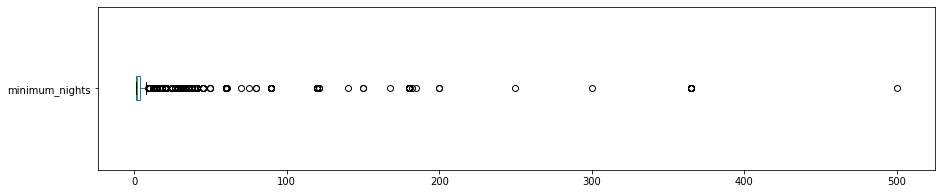

In [15]:
#minumum nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show
# ver quantidade de valores acima de 60 dias
print("minumum_nights: valores acima de 60:")
print("{} entradas".format(len(df[df.minimum_nights > 60])))
print("{:4f}%".format((len(df[df.minimum_nights >60])/ df.shape[0])*100))

price:valores acima de 1000:
82 Entradas
0.000000%


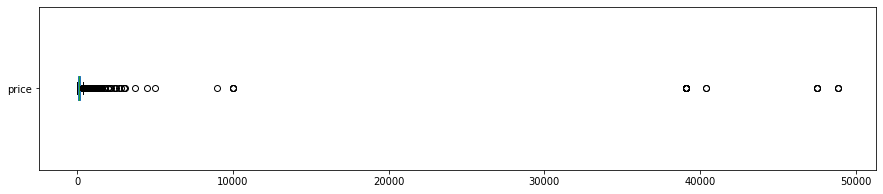

In [16]:
# price
df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show
# ver quantidade de valores acima 1000
print("price:valores acima de 1000:")
print("{} Entradas".format(len(df[df.price> 1000])))
print("{:4f}%".format((len(df[df.minimum_nights >1000]) / df.shape[0])*100))

Analisado os graficos foi verificado que o dataset contem algum dados muitos discrepantes dos outros, e com isso sera feita uma limpeza nesses dados para uma análise mais assertiva. (Pesquisas mais aprofundadas devem ser feitas)

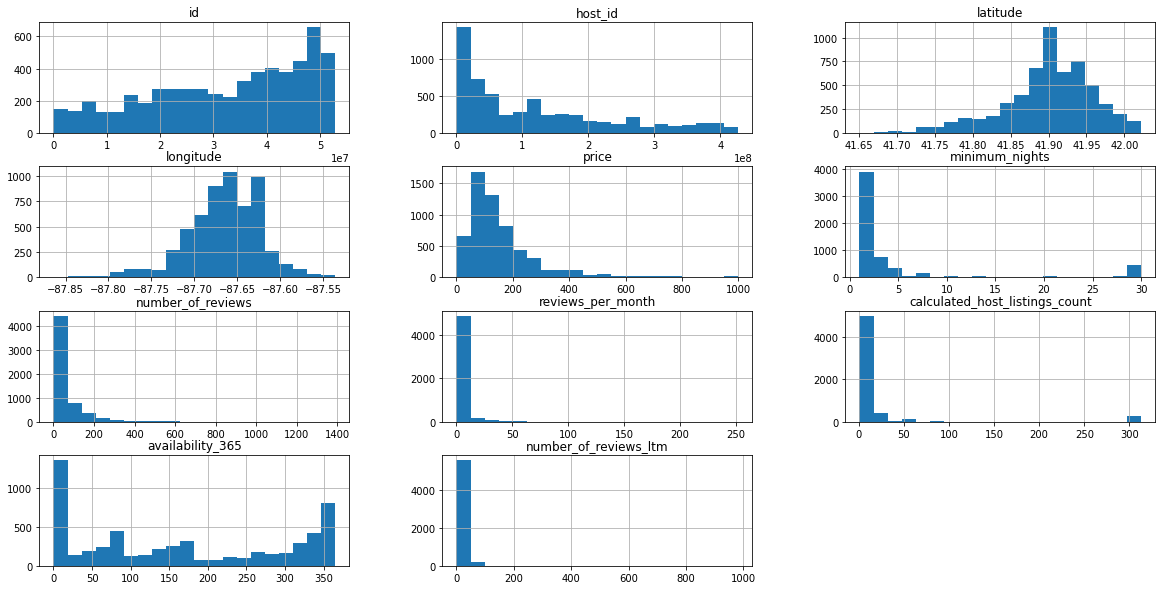

In [17]:
#histogramas sem *outliers*
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#remover coluna
df_clean.drop('neighbourhood_group',axis=1,inplace=True)

#plotar novos graficos
df_clean.hist(bins=20, figsize=(20,10));

Feito a limpeza dos outliers, agora podemos refazer a anilise com os dados mais assertivos e tendo assim uma conclusão sobre os melhores preços e localização.

Pondendo assim observar a maior parte dos preços se concentra entre 1 a 200 dollars e mínimo de noites tambem.

### **Q4. Qual a média dos preços de aluguel?**

In [18]:
# ver a média da coluna `price``
df_clean.price.mean()

156.72077028885832

A Média de preços dos imoveis na cidade de chicago e cerca de $156,72 dollars por dia.

### **Q4. Qual a correlação existente entre as variáveis**

In [28]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
display(corr)




# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,-0.029385,-0.104104,-0.028468,0.098998
minimum_nights,-0.029385,1.000000,-0.190754,-0.110399,0.130114
number_of_reviews,-0.104104,-0.190754,1.000000,0.191675,0.025991
reviews_per_month,-0.028468,-0.110399,0.191675,1.000000,0.100904
availability_365,0.098998,0.130114,0.025991,0.100904,1.000000


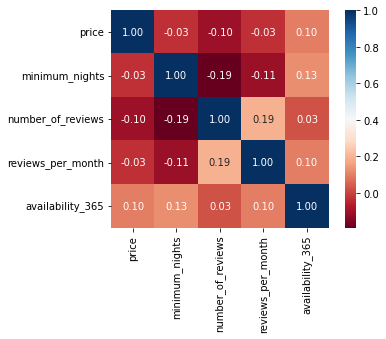

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com o grafico podemos osbservar as correlações envolvendo os preços, minimo de noites, numeros de reviews e entre outros.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4142
Private room       1524
Shared room          90
Hotel room           60
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    71.217331
Private room       26.203576
Shared room         1.547455
Hotel room          1.031637
Name: room_type, dtype: float64

O tipo de imovel mais alugado no airbnb da cidade de Chicago são casas/apartamentos , sendo cerca de 71% das buscas de seus clientes.

### **Q6. Qual a localidade mais cara do dataset?**



In [23]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Loop               221.879310
Near North Side    207.922010
Near South Side    207.769231
Lincoln Park       204.507874
Burnside           200.000000
West Town          181.365177
Lake View          176.168582
Near West Side     175.937294
North Center       172.966667
Uptown             156.497382
Name: price, dtype: float64

A Localidade mais cara do dataset de Chicago e a regiao do loop que e caracterizado por ser uma área vibrante com restaurantes ecléticos, lojas, teatros e parques. Composto principalmente de arranha-céus, também abriga a Willis Tower, com 108 andares. A icônica escultura "Cloud Gate" fica no Millennium Park. O Grant Park apresenta a grande fonte de Buckingham, em estilo rococó, e o renomado Art Institute of Chicago, e organiza eventos anuais como o The Taste of Chicago e o Lollapalooza , e tem um preço medio de 221 dollars por dia e sendo a assim umas das regioes mais caras de chicago.

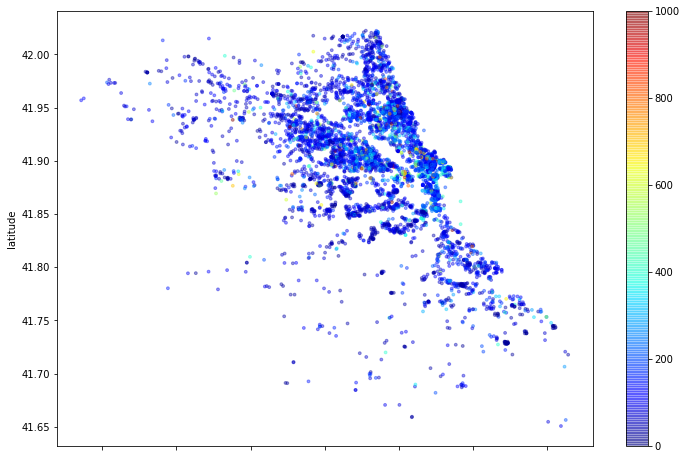

In [24]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter",x='longitude', y='latitude' , alpha=0.4, c=df_clean['price'], s=8,cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [25]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.839924346629986

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis( PRECISA SER FEITA UMA ANÁLISE MAIS EXPLORATÓRIA)

Com os dados analisados do dataset podemos analisar as regiões mais caras de Chicago, as correlações dos preços com outros fatores, verificando se tem alguma coisa que interligar os resultados, mas podemos indetificar que a cidade de chicago tem uma taxa de preço bem controlada, média de minimos de noite e muito elevado na cidade devido ao crescimento na área turisticas devido alguns fatores principais de sua cidade como (arquiterura,setor empresarial,Parques e cultura).

 

